<a href="https://colab.research.google.com/github/Anmolcool/CNN/blob/main/Transfer_Learning_Model_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

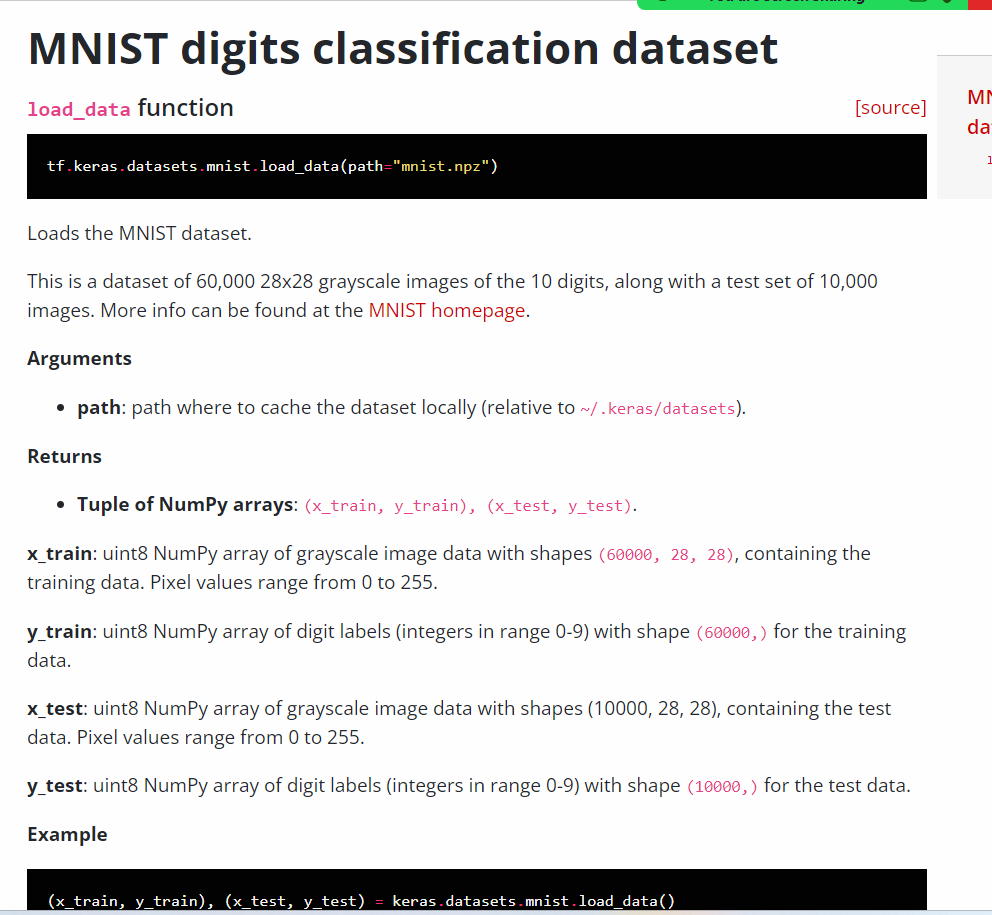

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
# Load the data into train and test for MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# Normalize the value to [0, 1]

x_train = x_train/255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


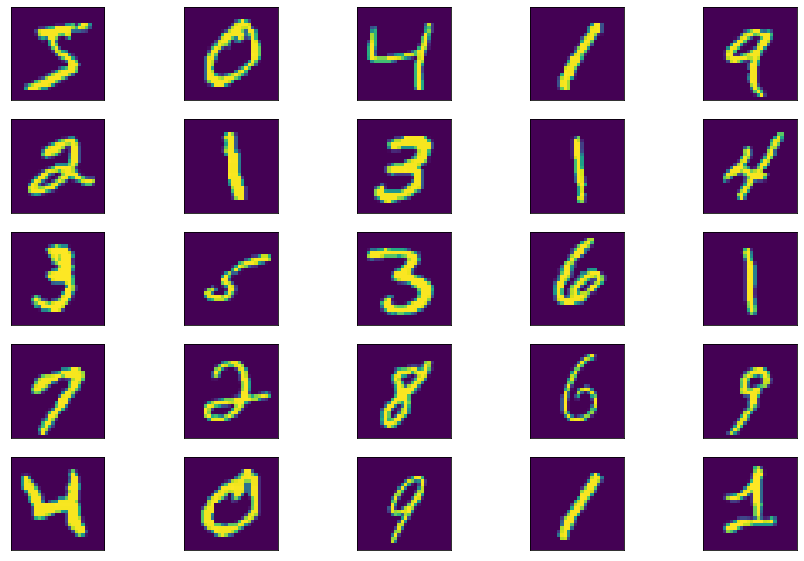

In [ ]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

# Building LeNet 5 Model

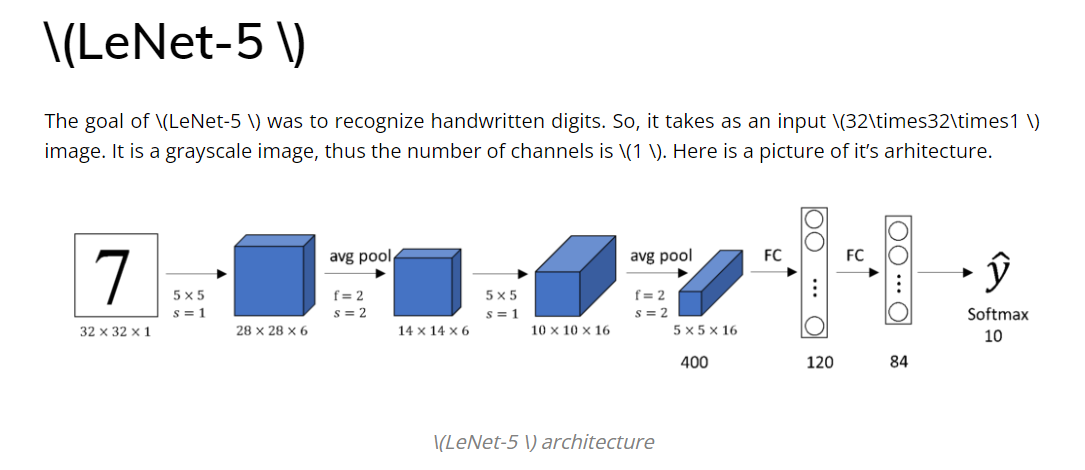

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D

In [ ]:
# Architecure
model = Sequential()

# C1 - Convolutional Layer
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'tanh', input_shape=(28,28,1)))
# Pooling Layer 1 - Average
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# C2 - Convolutional Layer
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'tanh'))
# Pooling Layer 2 - Average
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# DNN
# 1ST - Flatten
model.add(Flatten())

# Hidden Layer 1
model.add(Dense(120, activation='tanh'))
# Hidden Layer 2
model.add(Dense(84, activation='tanh'))
# Output
model.add(Dense(10, activation='softmax'))

# Summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
# check train and test result
history = model.fit(x_train, y_train , validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 13s 6ms/step - loss: 0.3440 - accuracy: 0.9016 - val_loss: 0.1482 - val_accuracy: 0.9556
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1190 - accuracy: 0.9636 - val_loss: 0.0874 - val_accuracy: 0.9717
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0769 - accuracy: 0.9768 - val_loss: 0.0703 - val_accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0566 - val_accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch

Text(0, 0.5, 'Accuracy')

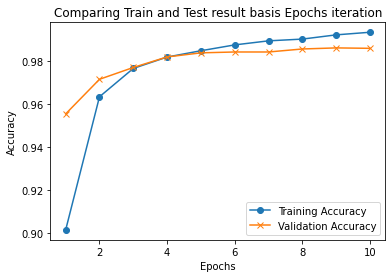

In [ ]:
# visualize the output
f, ax = plt.subplots()

ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')


ax.legend(['Training Accuracy', 'Validation Accuracy'], loc=0)
ax.set_title("Comparing Train and Test result basis Epochs iteration")

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

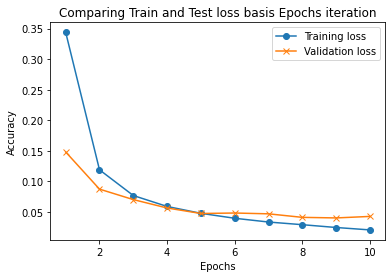

In [ ]:
f, ax = plt.subplots()

ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')


ax.legend(['Training loss', 'Validation loss'], loc=0)
ax.set_title("Comparing Train and Test loss basis Epochs iteration")

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

# Task :

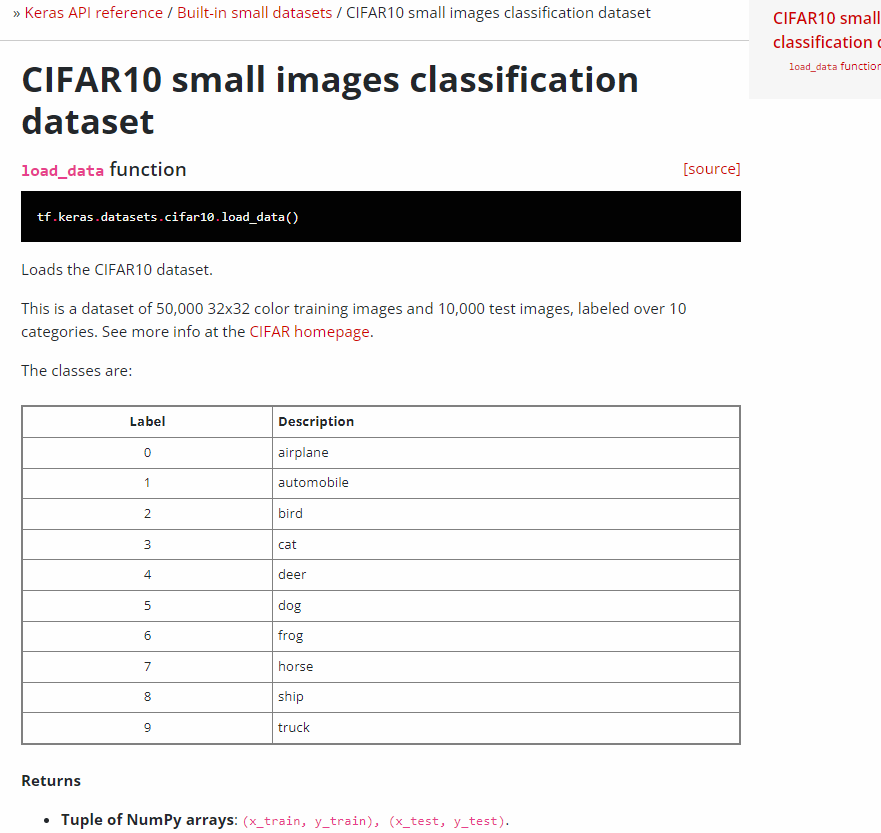

# connecting and extracting dataset from kaggle.com

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()